In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
file_path = r"C:\Users\mdmai\Downloads\sec_data.csv"

df = pd.read_csv(file_path)
df.head()

,Price,Brand,Processor Brand,Processor Model,Generation,Processor Base Frequency,Processor Max Frequency,Processor Core,Processor Thread,CPU Cache,RAM,RAM Type,Display Size,Graphics Memory,Battery Capacity
0,70400.0,4.0,1.0,1.0,11.0,2.4,4.2,4.0,1,8.0,1.0,1.0,14.0,1.0,48.0
1,129800.0,5.0,1.0,2.0,11.0,2.3,4.6,3.0,3,13.0,1.0,1.0,15.6,4.0,51.0
2,29950.0,11.0,1.0,7.0,12.0,1.1,2.8,2.0,2,4.0,4.0,3.0,14.0,1.0,10.0
3,32010.0,9.0,1.0,7.0,10.0,1.9,1.9,2.0,2,2.0,4.0,1.0,14.0,1.0,45.0
4,32999.0,6.0,2.0,10.0,11.0,3.1,3.7,2.0,2,1.0,4.0,1.0,14.1,1.0,10.0


In [3]:
df.shape

(1198, 15)

In [4]:
df.describe()


,Price,Brand,Processor Brand,Processor Model,Generation,Processor Base Frequency,Processor Max Frequency,Processor Core,Processor Thread,CPU Cache,RAM,RAM Type,Display Size,Graphics Memory,Battery Capacity
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,123225.104341,3.378130,1.246244,3.055927,10.369783,2.523205,4.199249,3.432387,2.208681,9.253756,1.855593,1.403172,14.938481,1.644407,50.307513
std,90148.929142,2.866816,0.520553,2.402180,2.309254,0.799433,0.558633,1.284189,1.439342,3.664143,1.148904,0.945582,1.077349,1.134452,16.760649
min,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,67500.000000,1.000000,1.000000,1.000000,11.000000,2.300000,4.100000,2.000000,1.000000,6.000000,1.000000,1.000000,14.000000,1.000000,41.000000
50%,92855.000000,2.000000,1.000000,2.000000,11.000000,2.400000,4.200000,4.000000,2.000000,8.000000,1.000000,1.000000,15.600000,1.000000,45.000000
75%,152990.000000,5.000000,1.000000,4.000000,12.000000,3.000000,4.600000,4.000000,3.000000,12.000000,2.000000,1.000000,15.600000,2.000000,56.000000
max,840770.000000,13.000000,5.000000,11.000000,13.000000,20.000000,5.600000,7.000000,11.000000,18.000000,6.000000,6.000000,18.400000,5.000000,100.000000


In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [6]:
df_train.head()

,Price,Brand,Processor Brand,Processor Model,Generation,Processor Base Frequency,Processor Max Frequency,Processor Core,Processor Thread,CPU Cache,RAM,RAM Type,Display Size,Graphics Memory,Battery Capacity
146,93300.0,3.0,1.0,1.0,11.0,2.4,4.2,4.0,1,8.0,1.0,1.0,14.0,1.0,45.0
928,159000.0,1.0,1.0,1.0,12.0,2.0,4.4,3.0,1,12.0,2.0,2.0,15.6,4.0,76.0
374,44490.0,1.0,1.0,7.0,12.0,1.1,3.4,2.0,2,4.0,4.0,1.0,15.6,1.0,42.0
882,100000.0,1.0,2.0,5.0,5.0,2.1,4.0,4.0,4,8.0,1.0,3.0,14.0,1.0,42.0
1159,62000.0,2.0,2.0,5.0,7.0,2.8,4.3,4.0,1,4.0,1.0,2.0,14.0,1.0,42.0


In [7]:
df_train.shape

(958, 15)

In [8]:
y_train = df_train.pop('Price')
X_train = df_train

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
estimator = LinearRegression()

rfe = RFE(estimator, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

<AxesSubplot: xlabel='Brand', ylabel='count'>

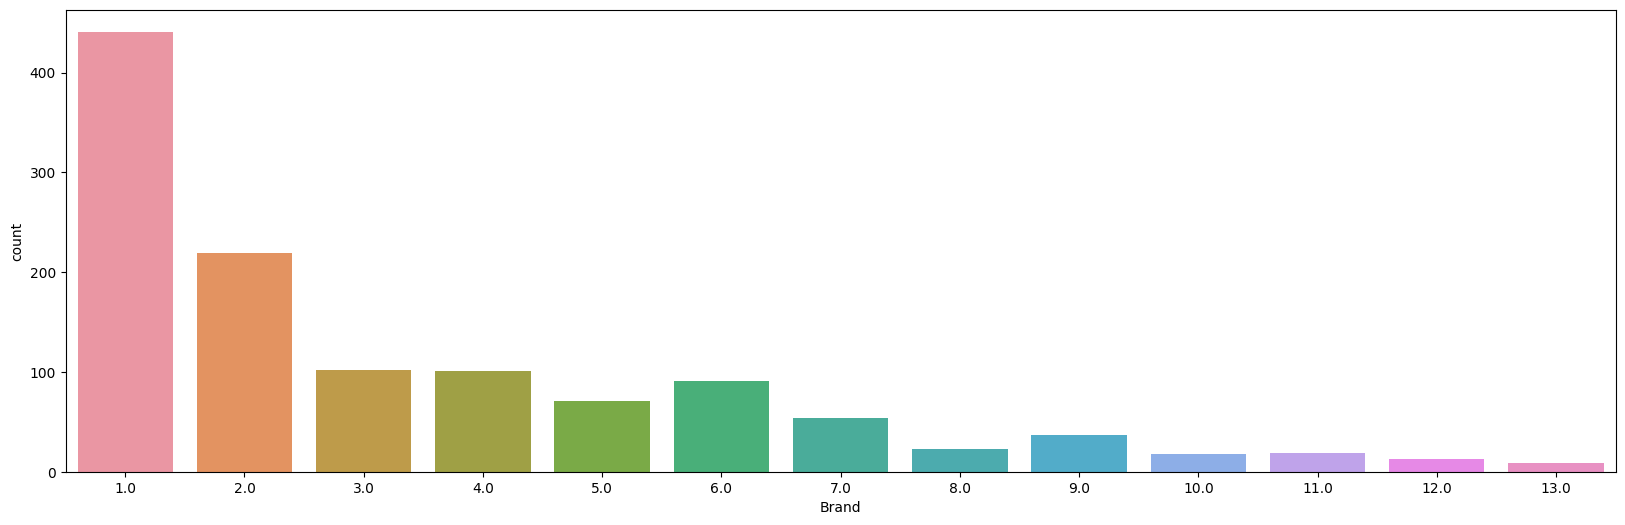

In [11]:
df['Brand'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Brand", data=df, ax=ax)

In [12]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
df_test.shape

(240, 15)

In [14]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4288774299.73
Mean Absolute Error: 40104.53
R^2 Score: 0.53


In [16]:
predicted_values = lasso.predict(X_test)

for i, (prediction, actual) in enumerate(zip(y_pred, y_test)):
   print(f" {i+1}. Predicted price: {prediction:.2f}, Actual price: {actual:.2f}")

 1. Predicted price: 28898.91, Actual price: 54500.00
 2. Predicted price: 110195.23, Actual price: 119000.00
 3. Predicted price: 16938.95, Actual price: 74327.00
 4. Predicted price: 105982.22, Actual price: 70310.00
 5. Predicted price: 95319.86, Actual price: 61050.00
 6. Predicted price: 8381.06, Actual price: 55550.00
 7. Predicted price: 128167.34, Actual price: 667280.00
 8. Predicted price: 63664.37, Actual price: 70990.00
 9. Predicted price: 78379.64, Actual price: 63260.00
 10. Predicted price: 79575.57, Actual price: 59000.00
 11. Predicted price: 72602.94, Actual price: 79750.00
 12. Predicted price: 63948.80, Actual price: 54790.00
 13. Predicted price: 57573.00, Actual price: 59460.00
 14. Predicted price: 106712.19, Actual price: 91000.00
 15. Predicted price: 210849.80, Actual price: 161670.00
 16. Predicted price: 225681.92, Actual price: 100466.00
 17. Predicted price: 174488.65, Actual price: 101770.00
 18. Predicted price: 328398.68, Actual price: 364990.00
 19. P

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred1 = rf.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 3003430702.83
Mean Absolute Error: 22258.60
R^2 Score: 0.67


In [19]:
for i, (prediction, actual) in enumerate(zip(y_pred1, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 45521.12, Actual Price: 54500.00
Data Point 2: Predicted Price: 112115.18, Actual Price: 119000.00
Data Point 3: Predicted Price: 74720.04, Actual Price: 74327.00
Data Point 4: Predicted Price: 71929.43, Actual Price: 70310.00
Data Point 5: Predicted Price: 68107.35, Actual Price: 61050.00
Data Point 6: Predicted Price: 58157.73, Actual Price: 55550.00
Data Point 7: Predicted Price: 117111.25, Actual Price: 667280.00
Data Point 8: Predicted Price: 71903.27, Actual Price: 70990.00
Data Point 9: Predicted Price: 64202.20, Actual Price: 63260.00
Data Point 10: Predicted Price: 62135.13, Actual Price: 59000.00
Data Point 11: Predicted Price: 60403.48, Actual Price: 79750.00
Data Point 12: Predicted Price: 55458.43, Actual Price: 54790.00
Data Point 13: Predicted Price: 53229.22, Actual Price: 59460.00
Data Point 14: Predicted Price: 95311.94, Actual Price: 91000.00
Data Point 15: Predicted Price: 159812.50, Actual Price: 161670.00
Data Point 16: Predicted Pri

In [20]:
from sklearn.linear_model import Ridge

In [21]:

ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)

y_pred2 = ridge.predict(X_test)


In [22]:
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 4288729742.21
Mean Absolute Error: 40102.79
R^2 Score: 0.53


In [23]:
for i, (prediction, actual) in enumerate(zip(y_pred2, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 28919.26, Actual Price: 54500.00
Data Point 2: Predicted Price: 110189.44, Actual Price: 119000.00
Data Point 3: Predicted Price: 16936.70, Actual Price: 74327.00
Data Point 4: Predicted Price: 105984.98, Actual Price: 70310.00
Data Point 5: Predicted Price: 95317.02, Actual Price: 61050.00
Data Point 6: Predicted Price: 8394.92, Actual Price: 55550.00
Data Point 7: Predicted Price: 128161.73, Actual Price: 667280.00
Data Point 8: Predicted Price: 63662.04, Actual Price: 70990.00
Data Point 9: Predicted Price: 78388.12, Actual Price: 63260.00
Data Point 10: Predicted Price: 79585.38, Actual Price: 59000.00
Data Point 11: Predicted Price: 72611.42, Actual Price: 79750.00
Data Point 12: Predicted Price: 63952.14, Actual Price: 54790.00
Data Point 13: Predicted Price: 57571.66, Actual Price: 59460.00
Data Point 14: Predicted Price: 106714.59, Actual Price: 91000.00
Data Point 15: Predicted Price: 210855.20, Actual Price: 161670.00
Data Point 16: Predicted Pr

In [24]:
from sklearn.svm import SVR

In [25]:
svr = SVR(kernel='rbf')

svr.fit(X_train, y_train)
y_pred3 = svr.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 10339393005.88
Mean Absolute Error: 61614.21
R^2 Score: -0.14


In [27]:
for i, (prediction, actual) in enumerate(zip(y_pred3, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 92758.97, Actual Price: 54500.00
Data Point 2: Predicted Price: 92770.15, Actual Price: 119000.00
Data Point 3: Predicted Price: 92716.71, Actual Price: 74327.00
Data Point 4: Predicted Price: 92780.82, Actual Price: 70310.00
Data Point 5: Predicted Price: 92760.77, Actual Price: 61050.00
Data Point 6: Predicted Price: 92737.52, Actual Price: 55550.00
Data Point 7: Predicted Price: 92819.21, Actual Price: 667280.00
Data Point 8: Predicted Price: 92743.17, Actual Price: 70990.00
Data Point 9: Predicted Price: 92758.84, Actual Price: 63260.00
Data Point 10: Predicted Price: 92757.54, Actual Price: 59000.00
Data Point 11: Predicted Price: 92775.29, Actual Price: 79750.00
Data Point 12: Predicted Price: 92736.64, Actual Price: 54790.00
Data Point 13: Predicted Price: 92740.44, Actual Price: 59460.00
Data Point 14: Predicted Price: 92809.56, Actual Price: 91000.00
Data Point 15: Predicted Price: 92838.86, Actual Price: 161670.00
Data Point 16: Predicted Price:

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 6889592007.63
Mean Absolute Error: 29683.19
R^2 Score: 0.24


In [31]:
for i, (prediction, actual) in enumerate(zip(y_pred4, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 51320.00, Actual Price: 54500.00
Data Point 2: Predicted Price: 108000.00, Actual Price: 119000.00
Data Point 3: Predicted Price: 74735.38, Actual Price: 74327.00
Data Point 4: Predicted Price: 70310.00, Actual Price: 70310.00
Data Point 5: Predicted Price: 69220.00, Actual Price: 61050.00
Data Point 6: Predicted Price: 57550.00, Actual Price: 55550.00
Data Point 7: Predicted Price: 155000.00, Actual Price: 667280.00
Data Point 8: Predicted Price: 70950.00, Actual Price: 70990.00
Data Point 9: Predicted Price: 62500.00, Actual Price: 63260.00
Data Point 10: Predicted Price: 58500.00, Actual Price: 59000.00
Data Point 11: Predicted Price: 55500.00, Actual Price: 79750.00
Data Point 12: Predicted Price: 52500.00, Actual Price: 54790.00
Data Point 13: Predicted Price: 54450.00, Actual Price: 59460.00
Data Point 14: Predicted Price: 108280.00, Actual Price: 91000.00
Data Point 15: Predicted Price: 161670.00, Actual Price: 161670.00
Data Point 16: Predicted Pr

In [33]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred5 = gb.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)
mae = mean_absolute_error(y_test, y_pred5)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2887999546.01
Mean Absolute Error: 23600.32
R^2 Score: 0.68


In [39]:
for i, (prediction, actual) in enumerate(zip(y_pred5, y_test), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 52876.71, Actual Price: 54500.00
Data Point 2: Predicted Price: 104864.16, Actual Price: 119000.00
Data Point 3: Predicted Price: 70242.81, Actual Price: 74327.00
Data Point 4: Predicted Price: 78738.21, Actual Price: 70310.00
Data Point 5: Predicted Price: 58676.91, Actual Price: 61050.00
Data Point 6: Predicted Price: 56100.01, Actual Price: 55550.00
Data Point 7: Predicted Price: 149677.95, Actual Price: 667280.00
Data Point 8: Predicted Price: 86603.21, Actual Price: 70990.00
Data Point 9: Predicted Price: 70788.42, Actual Price: 63260.00
Data Point 10: Predicted Price: 65563.25, Actual Price: 59000.00
Data Point 11: Predicted Price: 67709.98, Actual Price: 79750.00
Data Point 12: Predicted Price: 58510.18, Actual Price: 54790.00
Data Point 13: Predicted Price: 48322.77, Actual Price: 59460.00
Data Point 14: Predicted Price: 106171.19, Actual Price: 91000.00
Data Point 15: Predicted Price: 148804.56, Actual Price: 161670.00
Data Point 16: Predicted Pr

In [40]:
# Assume X and y are your feature matrix and target variable respectively
# Update X and y with the relevant data from your dataset

# Create a list to store the individual models
models = []

# Train ten Random Forest models and add them to the list
for _ in range(10):
    # Create a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, max_depth=10)

    # Train the model on the data
    rf.fit(X, y)

    # Add the trained model to the list
    models.append(rf)

# Make predictions using each individual model
predictions = []
for model in models:
    pred = model.predict(X)
    predictions.append(pred)

# Combine the predictions using the average
ensemble_pred = np.mean(predictions, axis=0)

# Evaluate the ensemble model
mse = mean_squared_error(y, ensemble_pred)
mae = mean_absolute_error(y, ensemble_pred)
r2 = r2_score(y, ensemble_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 292432351.11206746
Mean Absolute Error: 9832.811865708434
R-squared: 0.9639863666163575


In [41]:
for i, (prediction, actual) in enumerate(zip(ensemble_pred,y), start=1):
    print(f"Data Point {i}: Predicted Price: {prediction:.2f}, Actual Price: {actual:.2f}")

Data Point 1: Predicted Price: 87398.82, Actual Price: 70400.00
Data Point 2: Predicted Price: 128035.59, Actual Price: 129800.00
Data Point 3: Predicted Price: 34768.33, Actual Price: 29950.00
Data Point 4: Predicted Price: 33144.53, Actual Price: 32010.00
Data Point 5: Predicted Price: 44596.62, Actual Price: 32999.00
Data Point 6: Predicted Price: 33144.53, Actual Price: 33420.00
Data Point 7: Predicted Price: 38807.52, Actual Price: 37950.00
Data Point 8: Predicted Price: 38888.99, Actual Price: 37950.00
Data Point 9: Predicted Price: 40394.51, Actual Price: 38630.00
Data Point 10: Predicted Price: 38695.10, Actual Price: 38520.00
Data Point 11: Predicted Price: 38888.99, Actual Price: 38500.00
Data Point 12: Predicted Price: 44354.15, Actual Price: 43400.00
Data Point 13: Predicted Price: 52091.60, Actual Price: 46550.00
Data Point 14: Predicted Price: 44354.15, Actual Price: 45650.00
Data Point 15: Predicted Price: 45895.74, Actual Price: 46200.00
Data Point 16: Predicted Price: 